In this blog, I will present the method for automatised search of the key parameters for (S)ARIMA forecasting models. 

This method could take a lot of time, but it can pay off because when you find the best parameter of your forecasting model, than it will save the time and raise the precision of your predictions. Also, manual trying could take you the most time, but this method could be helpful in some situation, having in mind that understanding why we should use exact parameters in forecasting model could be of crucial importance for better understanding the business problem. Nevertheless, this approach could fasten you exploration time and help you to get better understanding of your problem.

The hyperparameter we will tune in forecasting model of (S)ARIMA are seasonality paremeter (S), autoregression parameter (AR), differencing parameter (I) and moving average (MA). You can read more about this parameters in my previous blog (link) if needed.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
       315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
       314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
       318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
       321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
       320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
       319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
       317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
       318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
       322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
       324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
       323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
       323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
       322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
       323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
       327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
       330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
       330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
       329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
       328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
       328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
       333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
       336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
       336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
       335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
       335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
       335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
       340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
       343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
       343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
       343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
       342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
       342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
       347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
       351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]
co2 = pd.Series(co2, index=pd.date_range('1-1-1959', periods=len(co2), freq='M'), name = 'CO2')

We will check and plot trend and seasonality of the timeseries about CO2 emission in last 50 years and we see increasing trend and clear seasonal pattern due to the heating periods in the winter. 

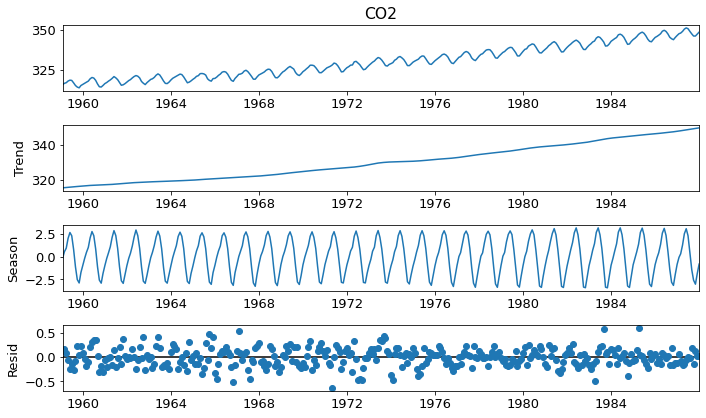

In [3]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(co2, seasonal=7)
res = stl.fit()
fig = res.plot()

In [4]:
def test_stationarity(timeseries, rolling=12):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Power consumption Old data')
    plt.xlabel('Time - periods(30s)')
    plt.ylabel('Power consumption in Watts')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The timeseries is stationary at 95% level of confidence')
    else:
        print('The timeseries is not stationary at 95% level of confidence')

In [5]:
co2

1959-01-31    315.58
1959-02-28    316.39
1959-03-31    316.79
1959-04-30    317.82
1959-05-31    318.39
               ...  
1987-08-31    347.54
1987-09-30    346.20
1987-10-31    346.20
1987-11-30    347.44
1987-12-31    348.67
Freq: M, Name: CO2, Length: 348, dtype: float64

After differencing the timeseries, it becomes stationary.

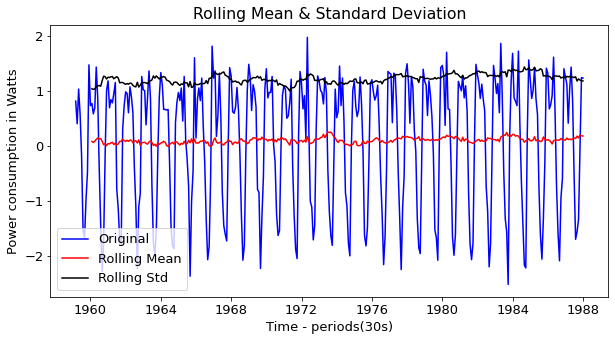

Results of Dickey-Fuller Test:
Test Statistic                  -4.688213
p-value                          0.000089
#Lags Used                      12.000000
Number of Observations Used    334.000000
Critical Value (1%)             -3.450081
Critical Value (5%)             -2.870233
Critical Value (10%)            -2.571401
dtype: float64
The timeseries is stationary at 95% level of confidence


In [6]:
co2_diff = co2 - co2.shift(1)
co2_diff = co2_diff.dropna()
test_stationarity(co2_diff, rolling=12)

Before we go to the autoarima search, we will check the correlogram to see how residuals are correlated across lags.

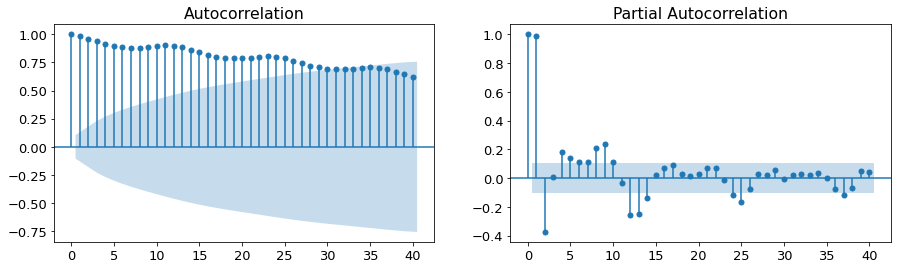

In [7]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(co2, 
                               lags=40, 
                               ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(co2, 
                                lags=40, 
                                ax=axes[1])

With this code, we have created several combinations of p (AR), d(I) and q(MA) parameter. In order to relax the search, we defined the seasonal (s) parameter to 12 as we are sure there is yearly pattern. For evaluating the goodness of the model we use Akaike information criteria (aic). This criteria asseesstatistical model of some data, by calculating the difference of the k -  the number of estimated parameters in the model and L be the maximum value of the likelihood function for the model. This means that the model with best AIC will have the optimimum value of likelihood and the smallest possible number of the parameters, thus enabling simplicity and efficiency of the model (parsimony). The AIC value of the model is the following:

$
AIC = 2k - 2ln(L)
$


In [8]:
import itertools
# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's for seasonal parameters
pdq2 = list(itertools.product(p2,d2,q2)) # simular to code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []
# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(co2, order=combination, seasonal_order=seasonal_combination,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue
            
best_aic = min(aics)

 This problem is unconstrained.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21887D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   7.219D+00
  F =   7.2188692516732402     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71394D+00    |proj g|=  9.68380D-01

At iterate    5    f=  1.40621D+00    |proj g|=  9.67223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   5.199D-06   1.406D+00
  F =   1.4061643811899835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   10    f=  5.06164D+01    |proj g|=  5.90976D+01

At iterate   15    f=  6.08339D+00    |proj g|=  2.32896D+00

At iterate   20    f=  3.12798D+00    |proj g|=  1.19894D-01

At iterate   25    f=  2.23194D+00    |proj g|=  2.57085D-01

At iterate   30    f=  1.77109D+00    |proj g|=  3.60186D-01

At iterate   35    f=  1.71614D+00    |proj g|=  4.35298D-03

At iterate   40    f=  1.71614D+00    |proj g|=  4.79894D-03
  ys=-1.158E-16  -gs= 3.232E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  1.71610D+00    |proj g|=  8.75357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47    145      2     1     0   6.289D-03   1.716D+00
  F =   1.7161009054711855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15776D+00    |proj g|=  1.74855D-02

At iterate    5    f=  1.15752D+00    |proj g|=  6.67577D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  9.67381D-01    |proj g|=  5.53134D-02

At iterate   10    f=  9.42264D-01    |proj g|=  1.74017D-01

At iterate   15    f=  9.14463D-01    |proj g|=  1.57569D-02

At iterate   20    f=  9.13323D-01    |proj g|=  7.04173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   1.695D-06   9.133D-01
  F =  0.91332284077911863     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.91912D+00    |proj g|=  8.43955D-04

At iterate   15    f=  5.91663D+00    |proj g|=  8.86462D-05

At iterate   20    f=  5.91648D+00    |proj g|=  9.88534D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     31      1     0     0   9.885D-06   5.916D+00
  F =   5.9164807225546792     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33833D+00    |proj g|=  4.23561D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10298D+00    |proj g|=  2.43808D-02

At iterate   10    f=  1.10215D+00    |proj g|=  6.42153D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   6.422D-07   1.102D+00
  F =   1.1021487549241520     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21887D+00    |proj g|=  9.96150D-01

At iterate    5    f=  6.74655D+00    |proj g|=  3.24214D-03


 This problem is unconstrained.



At iterate   10    f=  2.20906D+00    |proj g|=  9.37532D-02

At iterate   15    f=  1.67793D+00    |proj g|=  1.14999D-01

At iterate   20    f=  1.57116D+00    |proj g|=  5.33217D-02

At iterate   25    f=  1.56825D+00    |proj g|=  4.23515D-03

At iterate   30    f=  1.56824D+00    |proj g|=  3.62001D-03

At iterate   35    f=  1.56824D+00    |proj g|=  8.38076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     72      1     0     0   3.561D-03   1.568D+00
  F =   1.5682373040173641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  3.47345D+00    |proj g|=  4.86934D-01

At iterate   20    f=  1.89099D+00    |proj g|=  7.19363D-01

At iterate   25    f=  1.68051D+00    |proj g|=  2.92473D-02

At iterate   30    f=  1.51870D+00    |proj g|=  8.76816D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  1.49490D+00    |proj g|=  3.06182D-02

At iterate   40    f=  1.49434D+00    |proj g|=  2.76425D-03
  ys=-1.853E-10  -gs= 2.795E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43    126      2     1     0   1.920D-03   1.494D+00
  F =   1.4943364402271357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28590D+00    |proj g|=  5.34745D-01

At iterate    5  

 This problem is unconstrained.



At iterate    5    f=  7.66947D-01    |proj g|=  2.71960D-01

At iterate   10    f=  7.36970D-01    |proj g|=  1.13486D-01

At iterate   15    f=  7.14935D-01    |proj g|=  6.32762D-02

At iterate   20    f=  7.13232D-01    |proj g|=  6.31863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     30      1     0     0   1.461D-05   7.132D-01
  F =  0.71320345289594222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.91496D+00    |proj g|=  1.47181D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     35      1     0     0   1.888D-03   5.903D+00
  F =   5.9032246504988448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21887D+00    |proj g|=  9.95349D-01

At iterate    5    f=  6.74822D+00    |proj g|=  4.33667D-03


 This problem is unconstrained.



At iterate   10    f=  6.64450D+00    |proj g|=  1.22698D-01

At iterate   15    f=  5.72918D+00    |proj g|=  7.21572D-01

At iterate   20    f=  5.31344D+00    |proj g|=  4.80150D-02

At iterate   25    f=  5.28395D+00    |proj g|=  2.14664D-03

At iterate   30    f=  5.28092D+00    |proj g|=  8.40083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     52      1     0     0   6.891D-06   5.281D+00
  F =   5.2807738770076398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25381D+00    |proj g|=  5.38762D-01

At iterate    5    f=  8.69739D-01    |proj g|=  1.44198D-02

At iterate   10    f=  8.69004D-01    |proj g|=  8.44672D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   5.465D-07   8.690D-01
  F =  0.86900409904390319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   20    f=  3.71446D+00    |proj g|=  1.11418D-02

At iterate   25    f=  3.68750D+00    |proj g|=  8.32078D-03

At iterate   30    f=  3.68510D+00    |proj g|=  5.64420D-04
  ys=-1.557E-06  -gs= 6.669E-06 BFGS update SKIPPED

At iterate   35    f=  3.68510D+00    |proj g|=  3.08566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     75      1     2     0   3.086D-04   3.685D+00
  F =   3.6850984135639933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  5.85540D+00    |proj g|=  6.30661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     47      1     0     0   6.307D-03   5.855D+00
  F =   5.8553989082354834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23841D+00    |proj g|=  5.92790D-01

At iterate    5    f=  8.54074D-01    |proj g|=  1.20137D-01

At iterate   10    f=  8.18875D-01    |proj g|=  2.32535D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.85291D-01    |proj g|=  4.90752D-01

At iterate   10    f=  6.19546D-01    |proj g|=  5.46061D-02

At iterate   15    f=  5.94041D-01    |proj g|=  2.87388D-01

At iterate   20    f=  5.75252D-01    |proj g|=  1.22130D-01

At iterate   25    f=  5.73883D-01    |proj g|=  1.87330D-02

At iterate   30    f=  5.73770D-01    |proj g|=  5.78132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   4.015D-06   5.738D-01
  F =  0.57377000911073339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71895D-01    |proj g|=  3.19997D-01

At iterate    5    f=  2.55145D-01    |proj g|=  4.21988D-01

At iterate   10    f=  2.39946D-01    |proj g|=  1.28338D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   4.936D-05   2.399D-01
  F =  0.23992890960967972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.23719D-01    |proj g|=  2.87239D-02

At iterate   10    f=  5.23413D-01    |proj g|=  1.80199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     15      1     0     0   4.204D-06   5.234D-01
  F =  0.52341318854429808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17907D-01    |proj g|=  2.32654D-01

At iterate    5    f=  3.16107D-01    |proj g|=  4.88113D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73289D-01    |proj g|=  1.55616D-03

At iterate    5    f=  3.73289D-01    |proj g|=  5.52543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   1.274D-05   3.733D-01
  F =  0.37328885496693964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.04277D+00    |proj g|=  5.63142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   4.886D-07   1.043D+00
  F =   1.0427724895055510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33823D-01    |proj g|=  3.02353D-02

At iterate    5    f=  4.33281D-01    |proj g|=  2.24328D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  1.96823D-01    |proj g|=  6.91123D-02

At iterate   15    f=  1.93169D-01    |proj g|=  4.40768D-03

At iterate   20    f=  1.93163D-01    |proj g|=  1.22425D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   1.185D-05   1.932D-01
  F =  0.19316320603401060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44641D+00    |proj g|=  1.94740D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  5.09670D-01    |proj g|=  2.36684D-01

At iterate   10    f=  4.94730D-01    |proj g|=  1.16816D-01

At iterate   15    f=  4.86043D-01    |proj g|=  6.77385D-03

At iterate   20    f=  4.86036D-01    |proj g|=  2.49913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     49      1     0     0   2.499D-05   4.860D-01
  F =  0.48603571718004512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.38382D-01    |proj g|=  6.10067D+00

At iterate   10    f=  2.86781D-01    |proj g|=  6.06916D-02

At iterate   15    f=  2.83151D-01    |proj g|=  2.21574D-02

At iterate   20    f=  2.72988D-01    |proj g|=  3.21114D-01

At iterate   25    f=  2.56054D-01    |proj g|=  2.51905D-02

At iterate   30    f=  2.55559D-01    |proj g|=  2.94595D-02

At iterate   35    f=  2.55537D-01    |proj g|=  1.85378D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     70      1     0     0   1.487D-04   2.555D-01
  F =  0.25553680170564141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.18959D-01    |proj g|=  3.83446D-02

At iterate   10    f=  3.18776D-01    |proj g|=  7.39305D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   7.393D-05   3.188D-01
  F =  0.31877619818175601     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73417D-01    |proj g|=  9.20870D-01

At iterate    5    f=  2.21669D-01    |proj g|=  3.12317D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.32155D-01    |proj g|=  1.21267D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   4.697D-06   4.320D-01
  F =  0.43200885218781793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59187D-01    |proj g|=  9.56377D-01

At iterate    5    f=  2.11474D-01    |proj g|=  8.09994D-02


 This problem is unconstrained.



At iterate   10    f=  1.93749D-01    |proj g|=  3.57117D-02

At iterate   15    f=  1.92388D-01    |proj g|=  2.83932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   6.402D-05   1.924D-01
  F =  0.19238846155602005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11220D+00    |proj g|=  5.74596D-01

At iterate    5    f=  5.29636D-01    |proj g|=  4.33157D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.00110D-01    |proj g|=  3.42041D-01

At iterate   10    f=  2.83444D-01    |proj g|=  4.14176D-02

At iterate   15    f=  2.82917D-01    |proj g|=  4.78624D-02

At iterate   20    f=  2.73441D-01    |proj g|=  1.04450D-01

At iterate   25    f=  2.58681D-01    |proj g|=  4.59142D-02

At iterate   30    f=  2.55101D-01    |proj g|=  9.36626D-03
  ys=-4.653E-07  -gs= 2.253E-06 BFGS update SKIPPED

At iterate   35    f=  2.55085D-01    |proj g|=  1.30212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     63      1     1     0   1.302D-03   2.551D-01
  F =  0.25508517970279726     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31841D-01    |proj g|=  5.29805D-01

At iterate    5    f=  3.18170D-01    |proj g|=  4.18389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   8.319D-06   3.182D-01
  F =  0.31815442097312524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48770D-01    |proj g|=  4.45382D-01

At iterate    5    f=  6.96432D-01    |proj g|=  4.69989D-02

At iterate   10    f=  6.90109D-01    |proj g|=  4.34528D-03

At iterate   15    f=  6.89719D-01    |proj g|=  2.43840D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     37      1     0     0   5.496D-04   6.897D-01
  F =  0.68966960026709223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  7.45324D-01    |proj g|=  1.56570D-02

At iterate   20    f=  7.32122D-01    |proj g|=  8.52761D-03

At iterate   25    f=  7.30332D-01    |proj g|=  2.86184D-03

At iterate   30    f=  7.30277D-01    |proj g|=  6.73761D-04

At iterate   35    f=  7.30274D-01    |proj g|=  3.68250D-04

At iterate   40    f=  7.30273D-01    |proj g|=  3.50813D-04

At iterate   45    f=  7.30273D-01    |proj g|=  6.80030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     72      1     0     0   1.502D-04   7.303D-01
  F =  0.73027272438002255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.26811D-01    |proj g|=  9.31016D-02

At iterate   10    f=  6.90622D-01    |proj g|=  2.21680D-03

At iterate   15    f=  6.89298D-01    |proj g|=  4.67519D-03

At iterate   20    f=  6.88969D-01    |proj g|=  4.03161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     43      1     0     0   2.073D-03   6.889D-01
  F =  0.68894919548012945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35822D-01    |proj g|=  5.20468D-01

At iterate    5    f=  5.15696D-01    |proj g|=  4.34336D-02

At iterate   10    f=  5.01465D-01    |proj g|=  1.51110D-01

At iterate   15    f=  4.95040D-01    |proj g|=  1.04037D-02

At iterate   20    f=  4.94587D-01    |proj g|=  6.10790D-04

At iterate   25    f=  4.94521D-01    |proj g|=  6.97728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     47      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11731D-01    |proj g|=  1.10074D+00

At iterate    5    f=  2.69938D-01    |proj g|=  1.61500D-01

At iterate   10    f=  2.58556D-01    |proj g|=  1.06954D-01

At iterate   15    f=  2.53127D-01    |proj g|=  1.28979D-02

At iterate   20    f=  2.52398D-01    |proj g|=  1.34428D-03

At iterate   25    f=  2.52328D-01    |proj g|=  6.35826D-03

At iterate   30    f=  2.52322D-01    |proj g|=  1.26560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  5.24785D-01    |proj g|=  7.76451D-04

At iterate   25    f=  5.24559D-01    |proj g|=  3.03491D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     38      1     0     0   3.011D-04   5.246D-01
  F =  0.52455893033741885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14726D+00    |proj g|=  2.95615D-01

At iterate    5    f=  5.72517D-01    |proj g|=  8.22594D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  3.16597D-01    |proj g|=  3.43092D-02

At iterate   20    f=  3.16077D-01    |proj g|=  3.39645D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  3.16065D-01    |proj g|=  4.70682D-03

At iterate   30    f=  3.15943D-01    |proj g|=  1.85799D-02
  ys=-5.175E-05  -gs= 8.703E-05 BFGS update SKIPPED

At iterate   35    f=  3.15831D-01    |proj g|=  1.38881D-02

At iterate   40    f=  3.15826D-01    |proj g|=  4.73932D-03

At iterate   45    f=  3.15825D-01    |proj g|=  5.83357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45    136      2     1     0   5.834D-03   3.158D-01
  F =  0.31582516859715198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   15    f=  3.83405D-01    |proj g|=  2.65955D-02

At iterate   20    f=  3.82998D-01    |proj g|=  4.78382D-03

At iterate   25    f=  3.82955D-01    |proj g|=  3.76293D-03

At iterate   30    f=  3.82953D-01    |proj g|=  4.49830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     53      1     0     0   6.700D-04   3.830D-01
  F =  0.38295337513593991     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.13531D-01    |proj g|=  2.70597D-01

At iterate   10    f=  2.62683D-01    |proj g|=  3.84276D-02

At iterate   15    f=  2.55088D-01    |proj g|=  1.60809D-01

At iterate   20    f=  2.53021D-01    |proj g|=  1.01902D-02

At iterate   25    f=  2.52753D-01    |proj g|=  5.99289D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     51      1     0     0   1.138D-02   2.528D-01
  F =  0.25275099202732981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26253D+00    |proj g|=  8.21658D-02

At iterate    5    f=  1.24717D+00    |proj g|=  3.19650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


At iterate   20    f=  4.43007D-01    |proj g|=  1.17358D-03

At iterate   25    f=  4.42931D-01    |proj g|=  1.97507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     48      1     0     0   2.382D-04   4.429D-01
  F =  0.44293101304051674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71693D-01    |proj g|=  1.02198D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.88537D-01    |proj g|=  1.11089D-01

At iterate   10    f=  2.30742D-01    |proj g|=  9.59874D-02

At iterate   15    f=  2.17482D-01    |proj g|=  5.21058D-02

At iterate   20    f=  2.15624D-01    |proj g|=  1.30833D-02

At iterate   25    f=  2.15415D-01    |proj g|=  8.37156D-03

At iterate   30    f=  2.15405D-01    |proj g|=  9.70157D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     46      1     0     0   9.702D-05   2.154D-01
  F =  0.21540495639315790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  4.93231D-01    |proj g|=  5.40399D-02

At iterate   25    f=  4.87870D-01    |proj g|=  8.57115D-03

At iterate   30    f=  4.87349D-01    |proj g|=  2.50124D-02

At iterate   35    f=  4.87314D-01    |proj g|=  1.14637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     64      1     0     0   1.146D-03   4.873D-01
  F =  0.48731369782575074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  2.92652D-01    |proj g|=  5.91601D-02

At iterate   20    f=  2.92214D-01    |proj g|=  3.42179D-02

At iterate   25    f=  2.91817D-01    |proj g|=  6.26510D-02

At iterate   30    f=  2.89318D-01    |proj g|=  1.11764D-02
  ys=-1.043E-05  -gs= 4.716E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  2.89281D-01    |proj g|=  5.62715D-03

At iterate   40    f=  2.88966D-01    |proj g|=  1.25082D-02

At iterate   45    f=  2.88616D-01    |proj g|=  1.55548D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  2.88415D-01    |proj g|=  2.23509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    153      3     1     0   2.235D-02   2.884D-01
  F =  0.28841526490371283     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34701D-01    |proj g|=  6.93683D-01

At iterate    5    f=  4.00756D-01    |proj g|=  6.09678D-02

At iterate   10    f=  3.47443D-01    |proj g|=  4.24163D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.20317D-01    |proj g|=  3.96606D-01

At iterate   10    f=  2.31596D-01    |proj g|=  8.15514D-02

At iterate   15    f=  2.17222D-01    |proj g|=  4.36773D-02

At iterate   20    f=  2.12459D-01    |proj g|=  5.33081D-02

At iterate   25    f=  2.11958D-01    |proj g|=  3.88367D-03

At iterate   30    f=  2.11902D-01    |proj g|=  2.50897D-03

At iterate   35    f=  2.11895D-01    |proj g|=  2.66625D-03

At iterate   40    f=  2.11894D-01    |proj g|=  1.88962D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     63      1     0     0   1.890D-04   2.119D-01
  F =  0.211894456698

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.27001D+02    |proj g|=  4.81463D+02

At iterate   10    f=  1.51985D+01    |proj g|=  1.77915D+01

At iterate   15    f=  3.19006D+00    |proj g|=  7.23823D-01

At iterate   20    f=  1.90807D+00    |proj g|=  1.27187D-01

At iterate   25    f=  1.36238D+00    |proj g|=  2.93695D-01

At iterate   30    f=  1.20887D+00    |proj g|=  2.94749D-02

At iterate   35    f=  1.18711D+00    |proj g|=  6.51464D-03

At iterate   40    f=  1.18552D+00    |proj g|=  9.38823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     50      1     0     0   8.616D-06   1.186D+00
  F =   1.18550513900

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.76696D-01    |proj g|=  8.44498D-02

At iterate   15    f=  2.51101D-01    |proj g|=  3.15642D-02

At iterate   20    f=  2.44761D-01    |proj g|=  3.87873D-03

At iterate   25    f=  2.44481D-01    |proj g|=  5.68714D-03

At iterate   30    f=  2.44471D-01    |proj g|=  6.25697D-04

At iterate   35    f=  2.44471D-01    |proj g|=  3.36559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     54      1     0     0   1.900D-04   2.445D-01
  F =  0.24447077345108670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  2.14837D+00    |proj g|=  3.88488D-01

At iterate   20    f=  6.68996D-01    |proj g|=  5.58147D-01

At iterate   25    f=  5.72072D-01    |proj g|=  6.49865D-03

At iterate   30    f=  5.67907D-01    |proj g|=  3.96634D-02

At iterate   35    f=  5.44378D-01    |proj g|=  1.27765D-02

At iterate   40    f=  5.44181D-01    |proj g|=  5.01884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     60      1     0     0   8.523D-05   5.442D-01
  F =  0.54417805389403484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.08014D+02    |proj g|=  2.59625D+02

At iterate   10    f=  6.46096D+00    |proj g|=  9.12119D+00

At iterate   15    f=  2.06204D+00    |proj g|=  3.58148D-01

At iterate   20    f=  9.56762D-01    |proj g|=  9.55648D-01

At iterate   25    f=  4.49709D-01    |proj g|=  1.65751D-01

At iterate   30    f=  3.36540D-01    |proj g|=  4.62537D-02

At iterate   35    f=  3.17512D-01    |proj g|=  1.89824D-02

At iterate   40    f=  3.16711D-01    |proj g|=  1.23001D-03

At iterate   45    f=  3.16711D-01    |proj g|=  6.68696D-03


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.16702D-01    |proj g|=  1.46327D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     89      1     0     0   1.463D-03   3.167D-01
  F =  0.31670248022725139     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13152D+00    |proj g|=  3.17431D+00

At iterate    5    f=  7.12205D-01    |proj g|=  4.23649D+00

At iterate   10    f=  3.86056D-01    |proj g|=  8.47447D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.62074D-01    |proj g|=  3.09199D-01

At iterate   10    f=  4.20555D-01    |proj g|=  8.17660D-01

At iterate   15    f=  3.03130D-01    |proj g|=  3.36538D-01

At iterate   20    f=  2.54086D-01    |proj g|=  7.10430D-03

At iterate   25    f=  2.45362D-01    |proj g|=  6.33611D-03

At iterate   30    f=  2.43738D-01    |proj g|=  6.66316D-03

At iterate   35    f=  2.43713D-01    |proj g|=  9.07345D-04

At iterate   40    f=  2.43713D-01    |proj g|=  3.18652D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     62      1     0     0   2.910D-05   2.437D-01
  F =  0.243712768203

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  1.29622D+00    |proj g|=  1.59624D-02

At iterate   40    f=  1.29353D+00    |proj g|=  1.81050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     52      1     0     0   6.401D-06   1.294D+00
  F =   1.2935187732253524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07962D+04    |proj g|=  2.34290D+05

At iterate    5    f=  2.34172D+02    |proj g|=  5.38091D+02

At iter

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.06354D+00    |proj g|=  9.35724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     65      1     0     0   9.357D-05   1.064D+00
  F =   1.0635366810383911     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34965D-01    |proj g|=  3.58370D-02

At iterate    5    f=  4.34487D-01    |proj g|=  1.30680D-04

At iterate   10    f=  4.34487D-01    |proj g|=  2.50864D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.48635D+02    |proj g|=  3.62876D+02

At iterate   10    f=  8.07680D+00    |proj g|=  1.26803D+01

At iterate   15    f=  2.08485D+00    |proj g|=  4.93695D-01

At iterate   20    f=  7.46811D-01    |proj g|=  2.19279D-01

At iterate   25    f=  5.81157D-01    |proj g|=  1.84551D-01

At iterate   30    f=  5.26400D-01    |proj g|=  1.24121D-02

At iterate   35    f=  5.25797D-01    |proj g|=  1.09180D-02

At iterate   40    f=  5.09825D-01    |proj g|=  1.56534D-01

At iterate   45    f=  5.07187D-01    |proj g|=  1.44866D-02

At iterate   50    f=  5.06809D-01    |proj g|=  5.61144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   15    f=  2.09014D+00    |proj g|=  5.46048D-01

At iterate   20    f=  7.48863D-01    |proj g|=  3.21348D-01

At iterate   25    f=  4.04881D-01    |proj g|=  2.34678D-01

At iterate   30    f=  2.98596D-01    |proj g|=  6.89301D-02

At iterate   35    f=  2.80195D-01    |proj g|=  1.50493D-01

At iterate   40    f=  2.79520D-01    |proj g|=  2.18890D-02

At iterate   45    f=  2.79503D-01    |proj g|=  9.94346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     80      1     0     0   4.477D-03   2.795D-01
  F =  0.27950202934282875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  3.26369D-01    |proj g|=  1.49810D-02

At iterate   20    f=  3.22283D-01    |proj g|=  9.05864D-03

At iterate   25    f=  3.22221D-01    |proj g|=  6.54869D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     81      2     0     0   1.202D-05   3.222D-01
  F =  0.32222065483118822     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19559D-01    |proj g|=  1.19818D-01

At iterate    5    f=  3.69903D-01    |proj g|=  4.04083D-01

At iterate   10    f=  3.35570D-01    |proj g|=  6.07260D-01

At iterate   15    f=  2.27844D-01    |proj g|=  3.58126D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     98      2     0     0   1.101D-04   1.976D-01
  F =  0.19763701391262797     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05842D+04    |proj g|=  2.29747D+04

At iterate    5    f=  6.57678D+01    |proj g|=  1.35014D+02

At iterate   10    f=  5.73713D+00    |proj g|=  5.01567D+00

At iterate   15    f=  2.41339D+00    |proj g|=  2.26875D-01

At iter

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   35    f=  1.16118D+00    |proj g|=  8.00068D-02

At iterate   40    f=  1.15666D+00    |proj g|=  3.49420D-03

At iterate   45    f=  1.15654D+00    |proj g|=  1.18494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     57      1     0     0   1.860D-06   1.157D+00
  F =   1.1565392757921269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05842D+04    |proj g|=  2.29747D+04

At iter

 This problem is unconstrained.



At iterate   20    f=  1.45758D+00    |proj g|=  1.37398D-01

At iterate   25    f=  1.13899D+00    |proj g|=  1.54286D-01

At iterate   30    f=  9.97491D-01    |proj g|=  2.47619D-02

At iterate   35    f=  9.74102D-01    |proj g|=  2.54271D-02

At iterate   40    f=  9.71619D-01    |proj g|=  1.47573D-03

At iterate   45    f=  9.71565D-01    |proj g|=  1.97468D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     51      1     0     0   1.975D-06   9.716D-01
  F =  0.97156478748959674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.69726D-01    |proj g|=  1.32060D-01

At iterate   10    f=  2.62063D-01    |proj g|=  6.49280D-02

At iterate   15    f=  2.13272D-01    |proj g|=  4.42770D-01

At iterate   20    f=  2.02334D-01    |proj g|=  1.11398D-01

At iterate   25    f=  1.97146D-01    |proj g|=  2.30066D-02

At iterate   30    f=  1.96982D-01    |proj g|=  2.43466D-03

At iterate   35    f=  1.96981D-01    |proj g|=  7.37764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     45      1     0     0   6.592D-04   1.970D-01
  F =  0.19698075241836233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  6.92465D-01    |proj g|=  1.76760D-01

At iterate   25    f=  5.38901D-01    |proj g|=  3.14780D-01

At iterate   30    f=  5.27217D-01    |proj g|=  1.42419D-02

At iterate   35    f=  5.26868D-01    |proj g|=  9.08997D-03

At iterate   40    f=  5.23689D-01    |proj g|=  2.18543D-02

At iterate   45    f=  5.09969D-01    |proj g|=  5.59433D-02

At iterate   50    f=  5.06885D-01    |proj g|=  1.26696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   1.267D-02   5.069D-01
  F =  0.50688510328115188     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70486D+04    |proj g|=  3.87275D+04

At iterate    5    f=  2.54305D+01    |proj g|=  5.92653D+01

At iterate   10    f=  2.85977D+00    |proj g|=  2.09845D+00

At iterate   15    f=  1.09290D+00    |proj g|=  5.81880D-01

At iterate   20    f=  5.52370D-01    |proj g|=  3.48793D-01

At iterate   25    f=  3.59206D-01    |proj g|=  1.69029D-01

At iterate   30    f=  2.83774D-01    |proj g|=  1.14637D-01

At iterate   35    f=  2.77758D-01    |proj g|=  1.53484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  3.28499D-01    |proj g|=  5.17277D-02

At iterate   15    f=  3.27658D-01    |proj g|=  2.52033D-02

At iterate   20    f=  3.21979D-01    |proj g|=  5.47474D-03

At iterate   25    f=  3.21778D-01    |proj g|=  6.40782D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     41      1     0     0   1.449D-05   3.218D-01
  F =  0.32177759005863787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  3.49294D-01    |proj g|=  3.68074D-02

At iterate   15    f=  2.65333D-01    |proj g|=  1.83467D-01

At iterate   20    f=  2.27046D-01    |proj g|=  2.75717D-02

At iterate   25    f=  2.23851D-01    |proj g|=  1.08967D-01

At iterate   30    f=  2.02644D-01    |proj g|=  2.43666D-02

At iterate   35    f=  1.98375D-01    |proj g|=  1.41488D-01

At iterate   40    f=  1.96940D-01    |proj g|=  5.15459D-03

At iterate   45    f=  1.96881D-01    |proj g|=  7.97060D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     70      1     0     0   2.558D-05   1.969D-01
  F =  0.196880945263

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.36643D-01    |proj g|=  6.21570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   6.225D-06   4.366D-01
  F =  0.43664287782917199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65480D-01    |proj g|=  9.65853D-01

At iterate    5    f=  2.16382D-01    |proj g|=  6.58153D-02

At iterate   10    f=  1.97115D-01    |proj g|=  1.33546D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.66088D-01    |proj g|=  2.01185D+00

At iterate   10    f=  4.90570D-01    |proj g|=  1.55961D-02

At iterate   15    f=  4.87770D-01    |proj g|=  1.30973D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     33      1     0     0   9.671D-05   4.866D-01
  F =  0.48658196338396464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12278D-01    |proj g|=  8.79703D-01


 This problem is unconstrained.



At iterate    5    f=  3.39498D-01    |proj g|=  5.12064D-01

At iterate   10    f=  2.83945D-01    |proj g|=  1.08029D-02

At iterate   15    f=  2.83783D-01    |proj g|=  5.97403D-02

At iterate   20    f=  2.72995D-01    |proj g|=  3.44933D-01

At iterate   25    f=  2.60797D-01    |proj g|=  4.58934D-02

At iterate   30    f=  2.57385D-01    |proj g|=  3.98870D-03

At iterate   35    f=  2.57366D-01    |proj g|=  4.36602D-04
  ys=-2.574E-07  -gs= 5.567E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     86      2     1     0   3.059D-04   2.574D-01
  F =  0.25736557528647513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35555D-01    |proj g|=  5.57231D-01

At iterate    5    f=  3.21750D-01    |proj g|=  5.83272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16353D+00    |proj g|=  1.09006D-01

At iterate    5    f=  1.16030D+00    |proj g|=  2.71782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.472D-06   1.160D+00
  F =   1.1602984243553902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36087D-01    |proj g|=  5.17793D-03

At iterate    5    f=  4.35955D-01    |proj g|=  2.25794D-02

At iterate   10    f=  4.27494D-01    |proj g|=  6.83147D-03

At iterate   15    f=  4.27427D-01    |proj g|=  3.63128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   7.199D-07   4.274D-01
  F =  0.42742747146904131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  4.71958D-01    |proj g|=  3.41424D-02

At iterate   20    f=  4.69656D-01    |proj g|=  1.68277D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   2.975D-06   4.697D-01
  F =  0.46965570756793584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.50772D-01    |proj g|=  7.53080D-01


 This problem is unconstrained.



At iterate    5    f=  2.90913D-01    |proj g|=  1.44652D-01

At iterate   10    f=  2.80393D-01    |proj g|=  7.03601D-02

At iterate   15    f=  2.77903D-01    |proj g|=  8.73384D-02

At iterate   20    f=  2.73026D-01    |proj g|=  8.41516D-02

At iterate   25    f=  2.71394D-01    |proj g|=  2.05829D-02

At iterate   30    f=  2.54600D-01    |proj g|=  9.26428D-02

At iterate   35    f=  2.50466D-01    |proj g|=  5.35843D-03

At iterate   40    f=  2.50166D-01    |proj g|=  4.98659D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     60      1     0     0   4.987D-03   2.502D-01
  F =  0.250166313337

 This problem is unconstrained.



At iterate   15    f=  3.15878D-01    |proj g|=  4.87833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   2.659D-06   3.158D-01
  F =  0.31584192920330095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74492D-01    |proj g|=  9.03597D-01


 This problem is unconstrained.



At iterate    5    f=  2.25894D-01    |proj g|=  2.93482D-01

At iterate   10    f=  1.94422D-01    |proj g|=  2.02049D-02

At iterate   15    f=  1.93815D-01    |proj g|=  3.82115D-02

At iterate   20    f=  1.90312D-01    |proj g|=  3.22492D-02

At iterate   25    f=  1.89471D-01    |proj g|=  6.19088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   1.461D-05   1.895D-01
  F =  0.18947106798380092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  9.46284D-01    |proj g|=  4.52337D-02

At iterate   10    f=  9.39546D-01    |proj g|=  1.28483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     18      1     0     0   2.574D-05   9.395D-01
  F =  0.93954579442286290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33698D-01    |proj g|=  3.96629D-02

At iterate    5    f=  4.33255D-01    |proj g|=  6.51694D-04

At itera

 This problem is unconstrained.



At iterate   15    f=  4.24923D-01    |proj g|=  2.50829D-02

At iterate   20    f=  4.14497D-01    |proj g|=  3.06961D-02

At iterate   25    f=  4.07591D-01    |proj g|=  5.76678D-03

At iterate   30    f=  4.07444D-01    |proj g|=  9.66006D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     43      1     0     0   9.660D-06   4.074D-01
  F =  0.40744378570715800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.11460D-01    |proj g|=  6.57595D-02

At iterate   10    f=  1.94300D-01    |proj g|=  6.10257D-02

At iterate   15    f=  1.93106D-01    |proj g|=  1.57540D-03

At iterate   20    f=  1.93084D-01    |proj g|=  2.03348D-02

At iterate   25    f=  1.86864D-01    |proj g|=  4.22702D-02

At iterate   30    f=  1.86417D-01    |proj g|=  3.26108D-02

At iterate   35    f=  1.86334D-01    |proj g|=  1.17258D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     46      1     0     0   1.173D-05   1.863D-01
  F =  0.18633438274317757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  4.71251D-01    |proj g|=  2.08495D-02

At iterate   20    f=  4.64805D-01    |proj g|=  3.54496D-02

At iterate   25    f=  4.63094D-01    |proj g|=  5.38322D-02

At iterate   30    f=  4.59463D-01    |proj g|=  1.19584D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   5.467D-06   4.595D-01
  F =  0.45946275486712251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.98103D-01    |proj g|=  1.27655D-01

At iterate   10    f=  2.80211D-01    |proj g|=  1.40968D-02

At iterate   15    f=  2.75595D-01    |proj g|=  6.32056D-02

At iterate   20    f=  2.67585D-01    |proj g|=  4.94639D-02

At iterate   25    f=  2.65878D-01    |proj g|=  1.10327D-02

At iterate   30    f=  2.64725D-01    |proj g|=  1.15161D-01

At iterate   35    f=  2.54083D-01    |proj g|=  1.56244D-01
  ys=-1.767E-02  -gs= 1.174E-02 BFGS update SKIPPED
  ys=-8.733E-06  -gs= 1.221E-05 BFGS update SKIPPED

At iterate   40    f=  2.52121D-01    |proj g|=  2.90318D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  2.52051D-01    |proj g|=  1.97789D-02

At iterate   50    f=  2.51728D-01    |proj g|=  2.81204D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    111      2     2     0   2.812D-02   2.517D-01
  F =  0.25172775425630323     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30901D-01    |proj g|=  5.28105D-01

At iterate    5    f=  3.18826D-01    |proj g|=  1.99398D-02

At iterate   10    f=  3.18768D-01    |proj g|=  4.23485D-04

At iterate   15    f=  3.18759D-01    |proj g|=  1.36552D-02

At iterate   20    f=  3.18049D-01    |proj g|=  2.49317D-02

At iterate   25    f=  3.17028D-01    |proj g|=  1.62889D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.21228D-01    |proj g|=  3.08087D-01

At iterate   10    f=  1.93791D-01    |proj g|=  5.22884D-02

At iterate   15    f=  1.92992D-01    |proj g|=  1.10564D-03

At iterate   20    f=  1.92910D-01    |proj g|=  2.22195D-02

At iterate   25    f=  1.87769D-01    |proj g|=  3.79172D-02

At iterate   30    f=  1.86151D-01    |proj g|=  1.71333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   2.902D-06   1.861D-01
  F =  0.18613920039704332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26351D+00    |proj g|=  2.64736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.059D-07   1.264D+00
  F =   1.2635109668465114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10828D+00    |proj g|=  3.93671D-01

At iterate    5    f=  7.88818D-01    |proj g|=  1.82171D-01

At iterate   10    f=  7.17903D-01    |proj g|=  2.44170D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.483D-05   7.178D-01
  F =  0.71783680884144430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.55660D-01    |proj g|=  4.03559D-02

At iterate   10    f=  4.48243D-01    |proj g|=  3.11369D-03

At iterate   15    f=  4.48060D-01    |proj g|=  3.53298D-04

At iterate   20    f=  4.48058D-01    |proj g|=  5.46649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     34      1     0     0   1.664D-04   4.481D-01
  F =  0.44805834253198018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10465D+00    |proj g|=  1.60772D-03

At iterate   10    f=  1.07439D+00    |proj g|=  9.23757D-02

At iterate   15    f=  1.01023D+00    |proj g|=  3.13139D-02

At iterate   20    f=  9.98795D-01    |proj g|=  4.68418D-03

At iterate   25    f=  9.97950D-01    |proj g|=  1.41781D-03

At iterate   30    f=  9.97877D-01    |proj g|=  1.28356D-03

At iterate   35    f=  9.97864D-01    |proj g|=  2.52162D-04

At iterate   40    f=  9.97862D-01    |proj g|=  5.09002D-05

At iterate   45    f=  9.97862D-01    |proj g|=  4.94830D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     66   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67351D-01    |proj g|=  1.76915D-01

At iterate    5    f=  4.92387D-01    |proj g|=  2.47622D-01

At iterate   10    f=  4.49826D-01    |proj g|=  3.27173D-03

At iterate   15    f=  4.46199D-01    |proj g|=  3.46874D-03

At iterate   20    f=  4.45862D-01    |proj g|=  3.94598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     36      1     0     0   2.943D-03   4.458D-01
  F =  0.44583075631507268     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  2.17885D-01    |proj g|=  2.63427D-02

At iterate   15    f=  2.14803D-01    |proj g|=  3.27005D-02

At iterate   20    f=  2.13310D-01    |proj g|=  6.88017D-02

At iterate   25    f=  2.09030D-01    |proj g|=  6.22121D-03

At iterate   30    f=  2.08934D-01    |proj g|=  3.70679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     48      1     0     0   3.683D-04   2.089D-01
  F =  0.20893387903420096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     44      1     0     0   7.685D-03   4.878D-01
  F =  0.48779948840426890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13998D+00    |proj g|=  3.13381D-01

At iterate    5    f=  5.67377D-01    |proj g|=  2.00395D-01

At iterate   10    f=  4.47360D-01    |proj g|=  1.59331D-01

At iterate   15    f=  3.14557D-01    |proj g|=  3.84566D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  3.45637D-01    |proj g|=  2.82367D-02

At iterate   15    f=  3.33196D-01    |proj g|=  5.69587D-03

At iterate   20    f=  3.32366D-01    |proj g|=  2.34897D-02

At iterate   25    f=  3.32283D-01    |proj g|=  9.94231D-04

At iterate   30    f=  3.32273D-01    |proj g|=  1.78131D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     54      1     0     0   6.762D-05   3.323D-01
  F =  0.33227226417498879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44251D-01    |proj g|=  7.60357D-01

At iterate    5    f=  2.55695D-01    |proj g|=  8.06406D-02

At iterate   10    f=  2.17929D-01    |proj g|=  5.54239D-02

At iterate   15    f=  2.14689D-01    |proj g|=  1.01369D-02

At iterate   20    f=  2.14260D-01    |proj g|=  1.37648D-02

At iterate   25    f=  2.14213D-01    |proj g|=  1.37965D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     44      1     0     0   1.383D-03   2.142D-01
  F =  0.21421260329461372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27512D+00    |proj g|=  1.62144D-01

At iterate    5    f=  1.22424D+00    |proj g|=  1.23462D-01

At iterate   10    f=  1.16955D+00    |proj g|=  2.10201D-02

At iterate   15    f=  1.16319D+00    |proj g|=  3.81162D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  9.90864D-01    |proj g|=  3.11954D-03

At iterate   25    f=  9.90738D-01    |proj g|=  5.12429D-04

At iterate   30    f=  9.90723D-01    |proj g|=  7.45020D-04

At iterate   35    f=  9.90720D-01    |proj g|=  4.15109D-04

At iterate   40    f=  9.90720D-01    |proj g|=  1.90493D-04

At iterate   45    f=  9.90720D-01    |proj g|=  3.21009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     55      1     0     0   3.210D-05   9.907D-01
  F =  0.99071994495493421     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.46802D-01    |proj g|=  1.23487D-01

At iterate   20    f=  4.39478D-01    |proj g|=  3.38370D-03

At iterate   25    f=  4.38505D-01    |proj g|=  5.78559D-03

At iterate   30    f=  4.38036D-01    |proj g|=  3.40787D-03

At iterate   35    f=  4.37988D-01    |proj g|=  1.10663D-03

At iterate   40    f=  4.37985D-01    |proj g|=  2.26365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     60      1     0     0   2.264D-04   4.380D-01
  F =  0.43798499429442106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  2.31276D-01    |proj g|=  8.78578D-02

At iterate   15    f=  2.28241D-01    |proj g|=  3.79236D-02

At iterate   20    f=  2.17791D-01    |proj g|=  6.78687D-02

At iterate   25    f=  2.11348D-01    |proj g|=  6.93231D-02

At iterate   30    f=  2.08788D-01    |proj g|=  6.56133D-03

At iterate   35    f=  2.06357D-01    |proj g|=  1.10469D-03

At iterate   40    f=  2.06077D-01    |proj g|=  1.89371D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     68      1     0     0   6.392D-03   2.060D-01
  F =  0.20604777444839883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08278D+00    |proj g|=  4.41845D-01

At iterate    5    f=  6.13501D-01    |proj g|=  5.36569D-01

At iterate   10    f=  5.01818D-01    |proj g|=  1.07047D-02

At iterate   15    f=  4.98082D-01    |proj g|=  2.76187D-02

At iter

 This problem is unconstrained.


  ys=-4.506E-01  -gs= 2.337E-02 BFGS update SKIPPED
  ys=-2.933E-11  -gs= 1.718E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  3.18927D-01    |proj g|=  1.00733D-01

At iterate   25    f=  3.04713D-01    |proj g|=  7.62445D-02
  ys=-1.487E-03  -gs= 1.721E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    137      3     3     0   5.551D-02   3.047D-01
  F =  0.30471300279183550     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93861D-01    |proj g|=  6.74220D-01

At iterate    5    f=  3.65969D-01    |proj g|=  9.42429D-02


 This problem is unconstrained.



At iterate   10    f=  3.50728D-01    |proj g|=  5.45468D-02

At iterate   15    f=  3.40671D-01    |proj g|=  1.50678D-01

At iterate   20    f=  3.31630D-01    |proj g|=  5.55911D-02

At iterate   25    f=  3.29074D-01    |proj g|=  5.50181D-03

At iterate   30    f=  3.28342D-01    |proj g|=  1.65089D-02

At iterate   35    f=  3.27487D-01    |proj g|=  5.16767D-03

At iterate   40    f=  3.27339D-01    |proj g|=  7.70585D-03

At iterate   45    f=  3.27332D-01    |proj g|=  1.31765D-03


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.27331D-01    |proj g|=  2.60272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   2.603D-04   3.273D-01
  F =  0.32733134127242930     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65647D-01    |proj g|=  8.36849D-01

At iterate    5    f=  3.06487D-01    |proj g|=  5.32978D-01

At iterate   10    f=  2.31913D-01    |proj g|=  5.62362D-02

At iter

 This problem is unconstrained.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   20    f=  2.25667D+00    |proj g|=  2.77035D-02

At iterate   25    f=  2.20753D+00    |proj g|=  1.80727D-03

At iterate   30    f=  1.35039D+00    |proj g|=  2.98666D-02
  ys=-1.381E+00  -gs= 8.105E-03 BFGS update SKIPPED

At iterate   35    f=  1.29409D+00    |proj g|=  2.40380D-02

At iterate   40    f=  1.25483D+00    |proj g|=  1.47244D-02

At iterate   45    f=  1.24836D+00    |proj g|=  8.64872D-03

At iterate   50    f=  1.24806D+00    |proj g|=  1.58315D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     87      1     1     0   1.583D-05   1.248D+00
  F =   1.2480608229142434     

 This problem is unconstrained.



At iterate   10    f=  7.91800D+00    |proj g|=  1.06533D+01

At iterate   15    f=  2.33599D+00    |proj g|=  4.21094D-01

At iterate   20    f=  1.79971D+00    |proj g|=  1.38640D-01

At iterate   25    f=  1.72246D+00    |proj g|=  4.41018D-03

At iterate   30    f=  1.71975D+00    |proj g|=  7.77478D-04

At iterate   35    f=  1.71895D+00    |proj g|=  2.38788D-02
  ys=-1.462E-01  -gs= 8.438E-03 BFGS update SKIPPED

At iterate   40    f=  1.14133D+00    |proj g|=  4.12389D-01

At iterate   45    f=  1.02366D+00    |proj g|=  1.91030D-02

At iterate   50    f=  1.01673D+00    |proj g|=  1.32810D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.36155D-01    |proj g|=  9.97540D-03

At iterate   15    f=  4.36124D-01    |proj g|=  1.33202D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   1.002D-05   4.361D-01
  F =  0.43612340802461819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95737D-01    |proj g|=  3.35102D-01

At iterate    5    f=  2.71389D-01    |proj g|=  3.23993D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  5.33230D-01    |proj g|=  1.98628D-02

At iterate   35    f=  5.18644D-01    |proj g|=  2.53413D-01

At iterate   40    f=  5.09147D-01    |proj g|=  5.12254D-02

At iterate   45    f=  5.07356D-01    |proj g|=  2.77284D-03

At iterate   50    f=  5.07339D-01    |proj g|=  8.07897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     74      1     0     0   8.079D-05   5.073D-01
  F =  0.50733865521499633     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  5.45018D+00    |proj g|=  8.60855D+00

At iterate   15    f=  1.71293D+00    |proj g|=  3.05866D-01

At iterate   20    f=  8.56920D-01    |proj g|=  3.43714D-01

At iterate   25    f=  6.48878D-01    |proj g|=  6.80299D-02

At iterate   30    f=  5.02842D-01    |proj g|=  8.01131D-02

At iterate   35    f=  3.40889D-01    |proj g|=  3.38074D-01

At iterate   40    f=  2.88869D-01    |proj g|=  6.77216D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   45    f=  2.80863D-01    |proj g|=  1.02554D-01

At iterate   50    f=  2.79693D-01    |proj g|=  3.13306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     92      2     0     0   3.133D-03   2.797D-01
  F =  0.27969269303931937     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10057D+00    |proj g|=  3.37882D+00

At iterate    5    f=  3.61144D-01    |proj g|=  8.45705D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  3.93556D-01    |proj g|=  5.10073D-01

At iterate   10    f=  3.52947D-01    |proj g|=  5.27835D-01

At iterate   15    f=  2.15870D-01    |proj g|=  5.07291D-02

At iterate   20    f=  2.13699D-01    |proj g|=  3.63967D-02

At iterate   25    f=  2.02580D-01    |proj g|=  1.70696D-02

At iterate   30    f=  2.01263D-01    |proj g|=  2.11293D-02

At iterate   35    f=  2.01183D-01    |proj g|=  1.71908D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     49      1     0     0   2.048D-04   2.012D-01
  F =  0.20118317941422206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-1.796E-03  -gs= 3.759E-03 BFGS update SKIPPED

At iterate   35    f=  1.58004D+00    |proj g|=  3.64184D-02

At iterate   40    f=  1.55464D+00    |proj g|=  3.37845D-02

At iterate   45    f=  1.55170D+00    |proj g|=  4.55460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     68      1     1     0   4.061D-06   1.552D+00
  F =   1.5516839148976407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.


At iterate   10    f=  4.22136D+00    |proj g|=  4.63929D+00

At iterate   15    f=  1.77892D+00    |proj g|=  2.37628D-01

At iterate   20    f=  1.23820D+00    |proj g|=  8.96314D-02

At iterate   25    f=  1.18964D+00    |proj g|=  1.33342D-02

At iterate   30    f=  1.18616D+00    |proj g|=  4.92623D-04

At iterate   35    f=  1.18564D+00    |proj g|=  1.86471D-02

At iterate   40    f=  1.16940D+00    |proj g|=  5.16696D-02

At iterate   45    f=  1.15663D+00    |proj g|=  1.17198D-02

At iterate   50    f=  1.15440D+00    |proj g|=  1.49007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95668D-01    |proj g|=  3.35287D-01

At iterate    5    f=  2.68392D-01    |proj g|=  6.06342D-02

At iterate   10    f=  2.29208D-01    |proj g|=  1.77011D-02

At iterate   15    f=  2.26600D-01    |proj g|=  2.93953D-02

At iterate   20    f=  2.05506D-01    |proj g|=  5.29964D-02

At iterate   25    f=  1.98407D-01    |proj g|=  1.48903D-01

At iterate   30    f=  1.95691D-01    |proj g|=  8.92556D-03

At iterate   35    f=  1.94243D-01    |proj g|=  1.06853D-02

At iterate   40    f=  1.94231D-01    |proj g|=  1.43448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  6.54349D-01    |proj g|=  2.85298D-01

At iterate   20    f=  5.55665D-01    |proj g|=  3.83753D-02

At iterate   25    f=  5.21259D-01    |proj g|=  6.19648D-02

At iterate   30    f=  5.20623D-01    |proj g|=  2.49098D-03

At iterate   35    f=  5.09093D-01    |proj g|=  5.57805D-02

At iterate   40    f=  5.07320D-01    |proj g|=  2.91095D-02

At iterate   45    f=  5.07033D-01    |proj g|=  7.44785D-03

At iterate   50    f=  5.06994D-01    |proj g|=  3.24287D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   3.243D-04   5.070D-01
  F =  0.506993874475

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f=  5.09900D-01    |proj g|=  2.75496D-01

At iterate   25    f=  4.32403D-01    |proj g|=  3.84274D-01

At iterate   30    f=  3.44473D-01    |proj g|=  7.88731D-02
  ys=-2.775E-01  -gs= 2.006E-02 BFGS update SKIPPED

At iterate   35    f=  3.34411D-01    |proj g|=  2.75632D-01

At iterate   40    f=  3.29263D-01    |proj g|=  5.53989D-02
  ys=-4.264E-18  -gs= 8.513E-17 BFGS update SKIPPED
  ys=-2.798E-07  -gs= 2.021E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    136      2     3     0   2.289D-02   3.292D-01
  F =  0.32923594163471392     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10074D+00    |proj g|=  3.38305D+00

At iterate    5    f=  3.70352D-01    |proj g|=  1.04945D+00



 This problem is unconstrained.


At iterate   10    f=  3.26851D-01    |proj g|=  7.59104D-02

At iterate   15    f=  3.25702D-01    |proj g|=  1.24421D-03

At iterate   20    f=  3.25440D-01    |proj g|=  1.32155D-02

At iterate   25    f=  3.22085D-01    |proj g|=  2.66640D-02

At iterate   30    f=  3.19931D-01    |proj g|=  3.73336D-03

At iterate   35    f=  3.19857D-01    |proj g|=  3.45867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     55      1     0     0   5.052D-05   3.199D-01
  F =  0.31985687205325047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate    5    f=  3.82378D-01    |proj g|=  8.39945D-01

At iterate   10    f=  2.78939D-01    |proj g|=  1.83364D-01

At iterate   15    f=  2.36907D-01    |proj g|=  2.73618D-02

At iterate   20    f=  2.25811D-01    |proj g|=  1.67917D-01

At iterate   25    f=  2.24199D-01    |proj g|=  5.45890D-03

At iterate   30    f=  2.10953D-01    |proj g|=  5.53471D-02

At iterate   35    f=  2.03537D-01    |proj g|=  7.86991D-02

At iterate   40    f=  1.97735D-01    |proj g|=  1.84816D-02

At iterate   45    f=  1.94795D-01    |proj g|=  3.48879D-02

At iterate   50    f=  1.94101D-01    |proj g|=  2.19869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   15    f=  1.88347D+00    |proj g|=  2.16679D-01

At iterate   20    f=  1.40299D+00    |proj g|=  6.36623D-02

At iterate   25    f=  1.30876D+00    |proj g|=  1.04969D-02

At iterate   30    f=  1.29811D+00    |proj g|=  7.15927D-03

At iterate   35    f=  1.29718D+00    |proj g|=  1.85430D-02

At iterate   40    f=  1.29477D+00    |proj g|=  2.65963D-02

At iterate   45    f=  1.29359D+00    |proj g|=  9.01973D-03

At iterate   50    f=  1.29341D+00    |proj g|=  3.32065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   3.321D-04   1.293D+00
  F =   1.29340680053

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f=  1.12018D+00    |proj g|=  2.20552D-02

At iterate   25    f=  1.07254D+00    |proj g|=  1.00928D-01

At iterate   30    f=  1.06401D+00    |proj g|=  1.34785D-02

At iterate   35    f=  1.06386D+00    |proj g|=  4.86092D-04

At iterate   40    f=  1.06341D+00    |proj g|=  3.40573D-02

At iterate   45    f=  1.05898D+00    |proj g|=  1.09463D-02

At iterate   50    f=  1.05857D+00    |proj g|=  5.68244D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   5.682D-04   1.059D+00
  F =   1.0585703472129560     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f=  4.34388D-01    |proj g|=  3.39921D-03

At iterate   25    f=  4.33998D-01    |proj g|=  6.15712D-02

At iterate   30    f=  4.32833D-01    |proj g|=  8.11474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     41      1     0     0   2.451D-06   4.328D-01
  F =  0.43282584479306713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94561D-01    |proj g|=  3.36754D-01


 This problem is unconstrained.



At iterate    5    f=  2.66176D-01    |proj g|=  6.82583D-02

At iterate   10    f=  2.11875D-01    |proj g|=  9.77621D-02

At iterate   15    f=  2.00258D-01    |proj g|=  3.16940D-02

At iterate   20    f=  1.97820D-01    |proj g|=  3.13368D-03

At iterate   25    f=  1.96382D-01    |proj g|=  8.38598D-02

At iterate   30    f=  1.95731D-01    |proj g|=  2.04041D-03

At iterate   35    f=  1.95720D-01    |proj g|=  2.46860D-04

At iterate   40    f=  1.95674D-01    |proj g|=  2.95887D-02

At iterate   45    f=  1.95504D-01    |proj g|=  1.07063D-02

At iterate   50    f=  1.95477D-01    |proj g|=  3.16966D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  3.82753D+01    |proj g|=  9.31004D+01

At iterate   10    f=  2.89489D+00    |proj g|=  3.10650D+00

At iterate   15    f=  9.28187D-01    |proj g|=  4.08072D-01

At iterate   20    f=  6.36617D-01    |proj g|=  1.44182D-01

At iterate   25    f=  5.23225D-01    |proj g|=  2.17540D-02

At iterate   30    f=  4.99322D-01    |proj g|=  9.10038D-02

At iterate   35    f=  4.91762D-01    |proj g|=  1.84087D-02

At iterate   40    f=  4.89931D-01    |proj g|=  9.34022D-03

At iterate   45    f=  4.87781D-01    |proj g|=  1.42051D-01

At iterate   50    f=  4.84603D-01    |proj g|=  1.68674D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


    6     50     60      1     0     0   1.687D-02   4.846D-01
  F =  0.48460332508626680     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28664D+04    |proj g|=  1.78719D+05

At iterate    5    f=  4.33692D+01    |proj g|=  1.07090D+02

At iterate   10    f=  3.02806D+00    |proj g|=  3.57974D+00

At iterate   15    f=  1.24932D+00    |proj g|=  4.86947D-01

At iterate   20    f=  5.13296D-01    |proj g|=  1.26080D-01

At iterate   25    f=  3.60501D-01    |proj g|=  3.54213D-01
  ys=-1.736E-01  -gs= 1.879E-02 BFGS update SKIPPED

At iterate   30    f= -0.00000D+00    |proj g|=  2.83771D+05
  ys=-3.537E+07  -gs= 1.006E+01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variabl

 This problem is unconstrained.



At iterate   10    f=  3.29637D-01    |proj g|=  5.03074D-02

At iterate   15    f=  3.20761D-01    |proj g|=  7.00943D-03

At iterate   20    f=  3.20411D-01    |proj g|=  8.22520D-04

At iterate   25    f=  3.20407D-01    |proj g|=  2.56385D-03

At iterate   30    f=  3.20314D-01    |proj g|=  3.31616D-02

At iterate   35    f=  3.20259D-01    |proj g|=  8.95418D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     51      1     0     0   5.938D-06   3.203D-01
  F =  0.32025899504227867     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.88370D-01    |proj g|=  2.61190D-01

At iterate   10    f=  2.53343D-01    |proj g|=  1.35720D-01

At iterate   15    f=  2.34188D-01    |proj g|=  1.03862D-01

At iterate   20    f=  2.04516D-01    |proj g|=  6.18334D-02

At iterate   25    f=  2.00079D-01    |proj g|=  4.44517D-03

At iterate   30    f=  1.98329D-01    |proj g|=  4.87306D-02

At iterate   35    f=  1.96741D-01    |proj g|=  2.09449D-02

At iterate   40    f=  1.96503D-01    |proj g|=  1.27915D-02

At iterate   45    f=  1.95565D-01    |proj g|=  1.84911D-03

At iterate   50    f=  1.95514D-01    |proj g|=  1.10102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02018D+00    |proj g|=  2.01350D-01

At iterate    5    f=  9.75980D-01    |proj g|=  2.26602D-02

At iterate   10    f=  9.75850D-01    |proj g|=  4.74878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   4.749D-06   9.758D-01
  F =  0.97584999486167179     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.15356D-01    |proj g|=  6.61323D-02

At iterate   10    f=  1.96198D-01    |proj g|=  7.86823D-03

At iterate   15    f=  1.95995D-01    |proj g|=  9.46911D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   6.018D-05   1.960D-01
  F =  0.19599510821527452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11466D+00    |proj g|=  3.67027D-01

At iterate    5    f=  5.73148D-01    |proj g|=  3.43265D-01

At iterate   10    f=  4.89966D-01    |proj g|=  1.39031D-02

At iterate   15    f=  4.88511D-01    |proj g|=  6.48337D-02

At iterate   20    f=  4.86550D-01    |proj g|=  2.21252D-03

At iterate   25    f=  4.86546D-01    |proj g|=  1.41338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     37      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46930D-01    |proj g|=  5.35399D-01

At iterate    5    f=  4.15719D-01    |proj g|=  3.03477D-01

At iterate   10    f=  3.15142D-01    |proj g|=  4.09488D-01

At iterate   15    f=  2.84042D-01    |proj g|=  3.89409D-02

At iterate   20    f=  2.83920D-01    |proj g|=  1.10828D-02

At iterate   25    f=  2.81857D-01    |proj g|=  2.17287D-01

At iterate   30    f=  2.61083D-01    |proj g|=  6.05472D-02

At iterate   35    f=  2.57882D-01    |proj g|=  4.78566D-02

At iterate   40    f=  2.57095D-01    |proj g|=  4.09662D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  2.57093D-01    |proj g|=  7.10239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     86      2     0     0   8.400D-05   2.571D-01
  F =  0.25709292536167927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35579D-01    |proj g|=  5.60783D-01

At iterate    5    f=  3.21549D-01    |proj g|=  1.68926D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  1.95920D-01    |proj g|=  7.52504D-03

At iterate   15    f=  1.95808D-01    |proj g|=  2.02034D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   2.957D-05   1.958D-01
  F =  0.19580818884881004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00433D+00    |proj g|=  1.19047D-01

At iterate    5    f=  9.65569D-01    |proj g|=  2.03007D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.39781D-01    |proj g|=  5.79639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     29      1     0     0   2.195D-05   8.398D-01
  F =  0.83975164301273941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90368D-01    |proj g|=  3.50803D-01

At iterate    5    f=  4.35610D-01    |proj g|=  1.61112D-02

At iterate   10    f=  4.34914D-01    |proj g|=  2.30056D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  4.19478D-01    |proj g|=  1.00714D-01

At iterate   20    f=  4.08034D-01    |proj g|=  1.91119D-02

At iterate   25    f=  4.04150D-01    |proj g|=  2.39733D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     36      1     0     0   1.765D-05   4.041D-01
  F =  0.40414976632106914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94754D-01    |proj g|=  7.53038D-01


 This problem is unconstrained.



At iterate    5    f=  2.09112D-01    |proj g|=  5.22213D-02

At iterate   10    f=  1.94082D-01    |proj g|=  1.38420D-02

At iterate   15    f=  1.90347D-01    |proj g|=  2.95216D-02

At iterate   20    f=  1.84387D-01    |proj g|=  1.07274D-02

At iterate   25    f=  1.84342D-01    |proj g|=  1.97603D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   1.976D-06   1.843D-01
  F =  0.18434183883441541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  4.67358D-01    |proj g|=  3.30158D-02

At iterate   15    f=  4.62000D-01    |proj g|=  8.50238D-02

At iterate   20    f=  4.56808D-01    |proj g|=  9.06965D-03

At iterate   25    f=  4.56183D-01    |proj g|=  2.26221D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   1.216D-06   4.562D-01
  F =  0.45617942328811439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48782D-01    |proj g|=  7.02012D-01

At iterate    5    f=  6.58944D-01    |proj g|=  3.59926D-01
  ys=-4.235E+06  -gs= 4.331E+01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76340D-01    |proj g|=  2.77608D-01

At iterate    5    f=  3.20856D-01    |proj g|=  2.35204D-02

At iterate   10    f=  3.20291D-01    |proj g|=  2.50831D-02

At iterate   15    f=  3.15553D-01    |proj g|=  1.83186D-01


 This problem is unconstrained.



At iterate   20    f=  3.06238D-01    |proj g|=  1.84735D-02

At iterate   25    f=  3.01097D-01    |proj g|=  4.51526D-03

At iterate   30    f=  3.00936D-01    |proj g|=  1.12358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     37      1     0     0   8.149D-06   3.009D-01
  F =  0.30093595661161415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07984D-01    |proj g|=  6.70679D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  1.93598D-01    |proj g|=  1.93788D-02

At iterate   15    f=  1.92831D-01    |proj g|=  7.73116D-02

At iterate   20    f=  1.86242D-01    |proj g|=  6.44803D-02

At iterate   25    f=  1.84117D-01    |proj g|=  2.69576D-03

At iterate   30    f=  1.84113D-01    |proj g|=  2.55237D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   2.552D-06   1.841D-01
  F =  0.18411270227998339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.49949D-01    |proj g|=  1.30741D-01

At iterate   10    f=  8.08306D-01    |proj g|=  3.53656D-02

At iterate   15    f=  7.19637D-01    |proj g|=  1.40539D-01

At iterate   20    f=  6.99321D-01    |proj g|=  1.06438D-01

At iterate   25    f=  6.98480D-01    |proj g|=  1.69922D-02

At iterate   30    f=  6.98221D-01    |proj g|=  6.41928D-03

At iterate   35    f=  6.98204D-01    |proj g|=  2.44807D-03

At iterate   40    f=  6.97959D-01    |proj g|=  9.56827D-02

At iterate   45    f=  6.96808D-01    |proj g|=  2.86477D-02

At iterate   50    f=  6.96471D-01    |proj g|=  2.64212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f=  4.00800D-01    |proj g|=  7.22235D-03

At iterate   25    f=  4.00752D-01    |proj g|=  1.76516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   3.888D-05   4.008D-01
  F =  0.40075241919568033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46558D-01    |proj g|=  9.62966D-01


 This problem is unconstrained.



At iterate    5    f=  2.00774D-01    |proj g|=  6.06504D-02

At iterate   10    f=  1.82986D-01    |proj g|=  1.22491D-02

At iterate   15    f=  1.82330D-01    |proj g|=  1.09842D-02

At iterate   20    f=  1.82138D-01    |proj g|=  3.68487D-04

At iterate   25    f=  1.82126D-01    |proj g|=  2.28330D-03

At iterate   30    f=  1.82121D-01    |proj g|=  1.32509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   1.082D-04   1.821D-01
  F =  0.18212142076405469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  4.95174D-01    |proj g|=  4.65535D-02

At iterate   15    f=  4.79703D-01    |proj g|=  6.96276D-02

At iterate   20    f=  4.61693D-01    |proj g|=  1.96146D-02

At iterate   25    f=  4.59142D-01    |proj g|=  1.49359D-01

At iterate   30    f=  4.56314D-01    |proj g|=  2.02144D-02

At iterate   35    f=  4.52434D-01    |proj g|=  3.11882D-02

At iterate   40    f=  4.51021D-01    |proj g|=  2.43691D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     59      1     0     0   4.070D-06   4.510D-01
  F =  0.45102068475215079     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  3.22593D-01    |proj g|=  3.36467D-01

At iterate   10    f=  3.07463D-01    |proj g|=  1.55595D-02

At iterate   15    f=  2.68816D-01    |proj g|=  5.20263D-02

At iterate   20    f=  2.62999D-01    |proj g|=  3.71340D-02

At iterate   25    f=  2.62202D-01    |proj g|=  7.89842D-03

At iterate   30    f=  2.57359D-01    |proj g|=  4.36950D-02

At iterate   35    f=  2.56199D-01    |proj g|=  2.74103D-03

At iterate   40    f=  2.55550D-01    |proj g|=  6.83192D-02

At iterate   45    f=  2.46343D-01    |proj g|=  1.92840D-01

At iterate   50    f=  2.41933D-01    |proj g|=  7.10334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  3.03314D-01    |proj g|=  2.91253D-03

At iterate   10    f=  3.03108D-01    |proj g|=  1.94709D-03

At iterate   15    f=  3.02714D-01    |proj g|=  5.99776D-02

At iterate   20    f=  3.00729D-01    |proj g|=  1.94893D-02

At iterate   25    f=  2.98591D-01    |proj g|=  3.43014D-03

At iterate   30    f=  2.98566D-01    |proj g|=  3.03345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     39      1     0     0   3.033D-05   2.986D-01
  F =  0.29856641186655691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.81952D-01    |proj g|=  8.26964D-03

At iterate   15    f=  1.81813D-01    |proj g|=  6.28323D-03

At iterate   20    f=  1.81774D-01    |proj g|=  5.86054D-04

At iterate   25    f=  1.81759D-01    |proj g|=  1.17418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   2.253D-05   1.818D-01
  F =  0.18175849841743358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38387D-01    |proj g|=  3.35957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   1.005D-05   6.384D-01
  F =  0.63838402426277496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.6

 This problem is unconstrained.



At iterate    5    f=  4.06512D-01    |proj g|=  1.90551D-01

At iterate   10    f=  3.90826D-01    |proj g|=  2.43774D-02

At iterate   15    f=  3.90672D-01    |proj g|=  7.00751D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     28      1     0     0   1.828D-05   3.907D-01
  F =  0.39067236014349987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13130D+00    |proj g|=  3.88326D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  6.81706D-01    |proj g|=  4.02242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     30      1     0     0   4.022D-05   6.817D-01
  F =  0.68170587355035783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14468D+00    |proj g|=  2.85618D-01

At iterate    5    f=  6.65024D-01    |proj g|=  2.45196D-01

At iterate   10    f=  5.86083D-01    |proj g|=  3.01004D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.24229D-01    |proj g|=  1.15328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     12      1     0     0   9.186D-06   5.242D-01
  F =  0.52422747461089858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03977D-01    |proj g|=  6.15835D-01

At iterate    5    f=  4.52593D-01    |proj g|=  2.91549D-01

At iterate   10    f=  3.92757D-01    |proj g|=  3.72047D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     48      2     0     0   7.314D-05   3.902D-01
  F =  0.39015494257398414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31407D+00    |proj g|=  3.36056D-01

At iterate    5    f=  1.26285D+00    |proj g|=  5.03796D-03

At iterate   10    f=  1.23192D+00    |proj g|=  2.67818D-01

At iterate   15    f=  1.12830D+00    |proj g|=  6.96372D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   8.020D-06   1.096D+00
  F =   1.0962958247710592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36025D-01    |proj g|=  2.97230D-01

At iterate    5    f=  4.74617D-01    |proj g|=  9.87568D-02

At iterate   10    f=  4.49656D-01    |proj g|=  3.20664D-02

At iterate   15    f=  4.46096D-01    |proj g|=  4.90112D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.50328D-01    |proj g|=  5.04240D-01

At iterate   10    f=  2.38420D-01    |proj g|=  2.75299D-01

At iterate   15    f=  2.22752D-01    |proj g|=  7.18339D-02

At iterate   20    f=  2.18201D-01    |proj g|=  4.01464D-02

At iterate   25    f=  2.09235D-01    |proj g|=  5.20078D-02

At iterate   30    f=  2.08357D-01    |proj g|=  7.75452D-02

At iterate   35    f=  2.07936D-01    |proj g|=  7.46182D-04

At iterate   40    f=  2.07911D-01    |proj g|=  1.09480D-03

At iterate   45    f=  2.07909D-01    |proj g|=  1.02271D-03


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  2.07908D-01    |proj g|=  4.37140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   4.371D-04   2.079D-01
  F =  0.20790827071602519     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92803D-01    |proj g|=  5.38901D-01

At iterate    5    f=  7.24700D-01    |proj g|=  6.00947D-01

At iterate   10    f=  5.33694D-01    |proj g|=  1.02810D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.07220D-01    |proj g|=  1.48949D-01

At iterate   10    f=  3.81561D-01    |proj g|=  1.14903D-01

At iterate   15    f=  2.86453D-01    |proj g|=  9.06417D-02

At iterate   20    f=  2.86021D-01    |proj g|=  6.64927D-03

At iterate   25    f=  2.85991D-01    |proj g|=  7.26665D-03

At iterate   30    f=  2.85990D-01    |proj g|=  5.31615D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  2.85986D-01    |proj g|=  2.38947D-03
  ys=-1.051E-17  -gs= 3.322E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   40    f=  2.85944D-01    |proj g|=  1.68594D-02

At iterate   45    f=  2.85869D-01    |proj g|=  5.88110D-03

At iterate   50    f=  2.85830D-01    |proj g|=  3.92974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    170      3     1     0   3.930D-03   2.858D-01
  F =  0.28582972831902786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50505D-01    |proj g|=  6.94647D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  3.35166D-01    |proj g|=  7.21007D-02

At iterate   20    f=  3.32362D-01    |proj g|=  3.59802D-03

At iterate   25    f=  3.32139D-01    |proj g|=  1.48710D-03

At iterate   30    f=  3.32128D-01    |proj g|=  3.34232D-03

At iterate   35    f=  3.32127D-01    |proj g|=  1.92481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     56      1     0     0   1.925D-04   3.321D-01
  F =  0.33212716105237206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.79056D-01    |proj g|=  1.92785D-01

At iterate   10    f=  2.25737D-01    |proj g|=  2.13566D-02

At iterate   15    f=  2.18998D-01    |proj g|=  8.98122D-02

At iterate   20    f=  2.14307D-01    |proj g|=  1.46068D-02

At iterate   25    f=  2.13947D-01    |proj g|=  1.57448D-02

At iterate   30    f=  2.13859D-01    |proj g|=  5.89401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   1.186D-03   2.139D-01
  F =  0.21385378267601177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   35    f=  1.08610D+00    |proj g|=  2.11463D-02

At iterate   40    f=  1.08590D+00    |proj g|=  9.61805D-04

At iterate   45    f=  1.08580D+00    |proj g|=  6.60078D-02

At iterate   50    f=  1.08564D+00    |proj g|=  2.90864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   2.909D-03   1.086D+00
  F =   1.0856430500556775     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  1.05365D+00    |proj g|=  5.41840D-02

At iterate   15    f=  1.00788D+00    |proj g|=  4.16322D-01

At iterate   20    f=  9.86078D-01    |proj g|=  8.32079D-02

At iterate   25    f=  9.83281D-01    |proj g|=  2.91315D-03

At iterate   30    f=  9.83270D-01    |proj g|=  2.06482D-03

At iterate   35    f=  9.78015D-01    |proj g|=  1.03328D-01

At iterate   40    f=  9.77108D-01    |proj g|=  2.11607D-02

At iterate   45    f=  9.77088D-01    |proj g|=  7.84778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     69      1     0     0   6.825D-05   9.771D-01
  F =  0.977088335023

 This problem is unconstrained.



At iterate    5    f=  4.62288D-01    |proj g|=  7.10771D-02

At iterate   10    f=  4.44839D-01    |proj g|=  1.20743D-02

At iterate   15    f=  4.38008D-01    |proj g|=  1.56497D-02

At iterate   20    f=  4.27682D-01    |proj g|=  1.41278D-02

At iterate   25    f=  4.26353D-01    |proj g|=  4.19074D-03

At iterate   30    f=  4.26157D-01    |proj g|=  3.27489D-04

At iterate   35    f=  4.26149D-01    |proj g|=  2.14911D-04

At iterate   40    f=  4.26149D-01    |proj g|=  1.09684D-04

At iterate   45    f=  4.26149D-01    |proj g|=  2.95487D-05

At iterate   50    f=  4.26147D-01    |proj g|=  1.95929D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  2.51501D-01    |proj g|=  2.26275D-01

At iterate   10    f=  2.27611D-01    |proj g|=  2.49381D-01

At iterate   15    f=  2.12777D-01    |proj g|=  5.64112D-02

At iterate   20    f=  2.12186D-01    |proj g|=  3.09510D-02

At iterate   25    f=  2.09246D-01    |proj g|=  6.98054D-03

At iterate   30    f=  2.08151D-01    |proj g|=  6.91066D-03

At iterate   35    f=  2.06830D-01    |proj g|=  9.76938D-03

At iterate   40    f=  2.06232D-01    |proj g|=  6.43847D-03

At iterate   45    f=  2.06155D-01    |proj g|=  2.62318D-04

At iterate   50    f=  2.06141D-01    |proj g|=  2.37458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05952D+00    |proj g|=  4.16499D-01

At iterate    5    f=  8.25251D-01    |proj g|=  2.14201D-01

At iterate   10    f=  6.92449D-01    |proj g|=  1.44916D-01

At iterate   15    f=  5.09724D-01    |proj g|=  1.93504D-01

At iterate   20    f=  5.00765D-01    |proj g|=  1.25656D-02

At iterate   25    f=  4.83080D-01    |proj g|=  4.97204D-02

At iterate   30    f=  4.79801D-01    |proj g|=  1.06059D-02

At iterate   35    f=  4.64313D-01    |proj g|=  6.03492D-02

At iterate   40    f=  4.62086D-01    |proj g|=  8.11319D-03

At iterate   45    f=  4.61832D-01    |proj g|=  1.75553D-02

At iterate   50    f=  4.61779D-01    |proj g|=  2.78375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  7.56501D-01    |proj g|=  1.24610D-01

At iterate   10    f=  6.39991D-01    |proj g|=  2.22861D-01

At iterate   15    f=  4.84077D-01    |proj g|=  2.91878D-01

At iterate   20    f=  3.19302D-01    |proj g|=  5.60090D-02

At iterate   25    f=  2.70892D-01    |proj g|=  1.00990D-01

At iterate   30    f=  2.70199D-01    |proj g|=  1.55668D-02

At iterate   35    f=  2.69985D-01    |proj g|=  5.04235D-02

At iterate   40    f=  2.69929D-01    |proj g|=  2.22046D-02

At iterate   45    f=  2.69906D-01    |proj g|=  6.00466D-03
  ys=-2.064E-10  -gs= 2.277E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.69814D-01    |proj g|=  1.32017D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    120      2     1     0   1.320D-02   2.698D-01
  F =  0.26981447643444034     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94589D-01    |proj g|=  6.70368D-01

At iterate    5    f=  3.56294D-01    |proj g|=  3.37763D-02


 This problem is unconstrained.



At iterate   10    f=  3.34663D-01    |proj g|=  6.94114D-02

At iterate   15    f=  3.31635D-01    |proj g|=  3.22744D-02

At iterate   20    f=  3.29186D-01    |proj g|=  8.72084D-03

At iterate   25    f=  3.23941D-01    |proj g|=  4.86711D-02

At iterate   30    f=  3.20977D-01    |proj g|=  1.88047D-02

At iterate   35    f=  3.20413D-01    |proj g|=  5.52269D-03

At iterate   40    f=  3.20374D-01    |proj g|=  1.72852D-03

At iterate   45    f=  3.20372D-01    |proj g|=  1.10918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     77      1     0     0   1.109D-04   3.204D-01
  F =  0.320371872451


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.93073D-01    |proj g|=  3.69637D-01

At iterate   10    f=  2.15928D-01    |proj g|=  1.19003D-01

At iterate   15    f=  2.12854D-01    |proj g|=  1.65673D-02

At iterate   20    f=  2.11535D-01    |proj g|=  2.61771D-02

At iterate   25    f=  2.08107D-01    |proj g|=  3.07696D-02

At iterate   30    f=  2.07488D-01    |proj g|=  1.62502D-03

At iterate   35    f=  2.07105D-01    |proj g|=  9.44619D-03

At iterate   40    f=  2.05922D-01    |proj g|=  1.82502D-02

At iterate   45    f=  2.05735D-01    |proj g|=  6.10708D-03

At iterate   50    f=  2.05697D-01    |proj g|=  6.64001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now we can see what hyperparameters for forecasting will give the best predictions. 

In [9]:
print('best aic is: ', round(best_aic, 3))
print(40*'==')
print ('ARIMA parameters: ', '\n', 'AR: ', combs[best_aic][0][0], '\n', 'I: ',combs[best_aic][0][1], '\n', 'MA: ',combs[best_aic][0][2])
print('Seasonal parameters:', combs[best_aic][1])

best aic is:  138.302
ARIMA parameters:  
 AR:  2 
 I:  1 
 MA:  1
Seasonal parameters: (0, 1, 1, 12)


In [10]:
combs[best_aic]

[(2, 1, 1), (0, 1, 1, 12)]

Congratulations! With this hyperparameters, we can do a train test split and make a predictions for a test set and than compare the predictions and test results. 

In [11]:
def train_test_split(timeseries, lags_for_prediction=12):
    split=len(timeseries)-lags_for_prediction
    train=timeseries[:split]
    test=timeseries[split:]
    return train, test

In [12]:
train_series, test_series = train_test_split(co2, 12)

In [17]:
def forecasting (p,d,q, season, lags_for_forecast, train_series):

    model = sm.tsa.statespace.SARIMAX(train_series, order=(p,d,q), seasonal_order=(p,d,q,season),
                                             simple_differencing=0, #if True  time series provided as endog is literally differenced and an ARMA model is fit to the resulting new time series
                                             enforce_stationarity=True,
                                             enforce_invertibility=False)
    fitted = model.fit(disp=-1)  

    # Forecast
    forecast = fitted.forecast(lags_for_forecast)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train_series, color='blue', label='train')
    plt.plot(test_series, color='green', label='test', alpha=0.6)
    plt.plot(forecast, color='red', label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    RSS=np.sqrt(sum(forecast.values-test_series.values.reshape(-1))**2)/lags_for_forecast
    print("\n", '\033[1m' +'Root Squared Error (RSS) of SARIMAX model(p,d,q)(p,d,q,s)' + '\033[0m',(p,d,q),season,':', round(RSS, 3),"\n")
    print(fitted.summary())

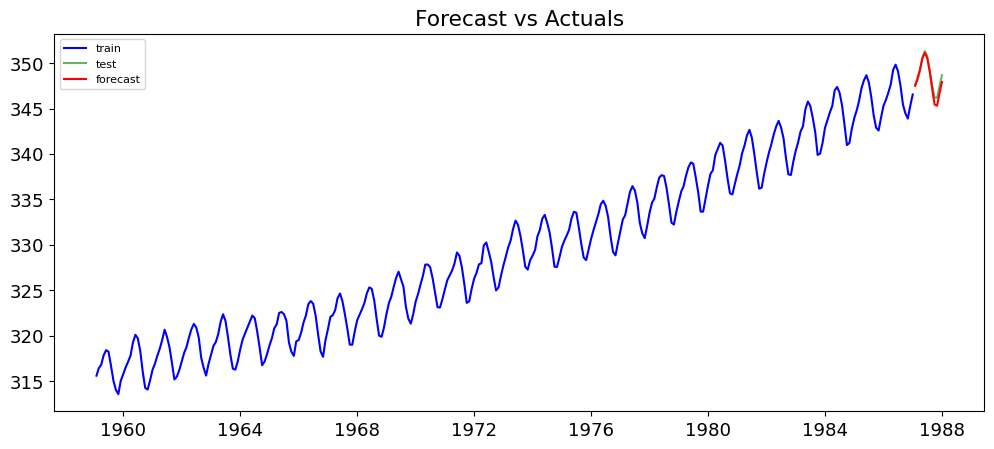


 Root Squared Error (RSS) of SARIMAX model(p,d,q)(p,d,q,s) (2, 1, 1) 12 : 0.313 

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  336
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -66.971
Date:                            Thu, 03 Feb 2022   AIC                            147.942
Time:                                    12:29:00   BIC                            174.386
Sample:                                01-31-1959   HQIC                           158.498
                                     - 12-31-1986                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1802      0.88

In [18]:
forecasting (2,1,1, 12, 12, train_series)